In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Add src to path
sys.path.append(str(Path.cwd().parent / 'src'))
import config

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### Loading and First Look to the Data

In [4]:
# Load data
df = pd.read_csv(config.RAW_DATA_FILE, delimiter=';')
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
print("\n" + "=" * 50)
print("BASIC STATISTICS")
print("=" * 50)
df.describe()


BASIC STATISTICS


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


##### Missing Values

In [10]:
print("=" * 50)
print("MISSING VALUES")
print("=" * 50)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✓ No missing values found!")

MISSING VALUES
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []
✓ No missing values found!


##### Target Distribution

In [ ]:
print("=" * 50)
print("TARGET VARIABLE DISTRIBUTION")
print("=" * 50)

target_counts = df['cardio'].value_counts()
target_pct = df['cardio'].value_counts(normalize=True) * 100

print(f"\nClass 0 (Healthy): {target_counts[0]} ({target_pct[0]:.2f}%)")
print(f"Class 1 (Disease): {target_counts[1]} ({target_pct[1]:.2f}%)")

TARGET VARIABLE DISTRIBUTION

Class 0 (Healthy): 35021 (50.03%)
Class 1 (Disease): 34979 (49.97%)


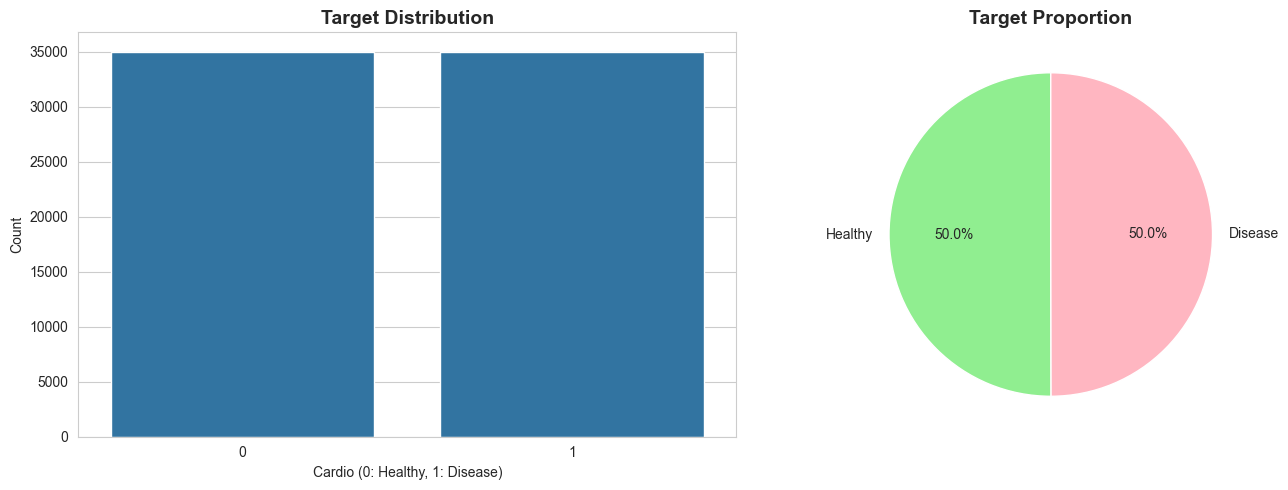

In [12]:
# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='cardio', ax=axes[0])
axes[0].set_title('Target Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cardio (0: Healthy, 1: Disease)')
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie(target_counts, labels=['Healthy', 'Disease'], autopct='%1.1f%%', 
            colors=['#90EE90', '#FFB6C1'], startangle=90)
axes[1].set_title('Target Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

##### Numeric Features

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('id')  # Remove ID column

print("=" * 50)
print("NUMERIC FEATURES")
print("=" * 50)
print(numeric_cols)

NUMERIC FEATURES
['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


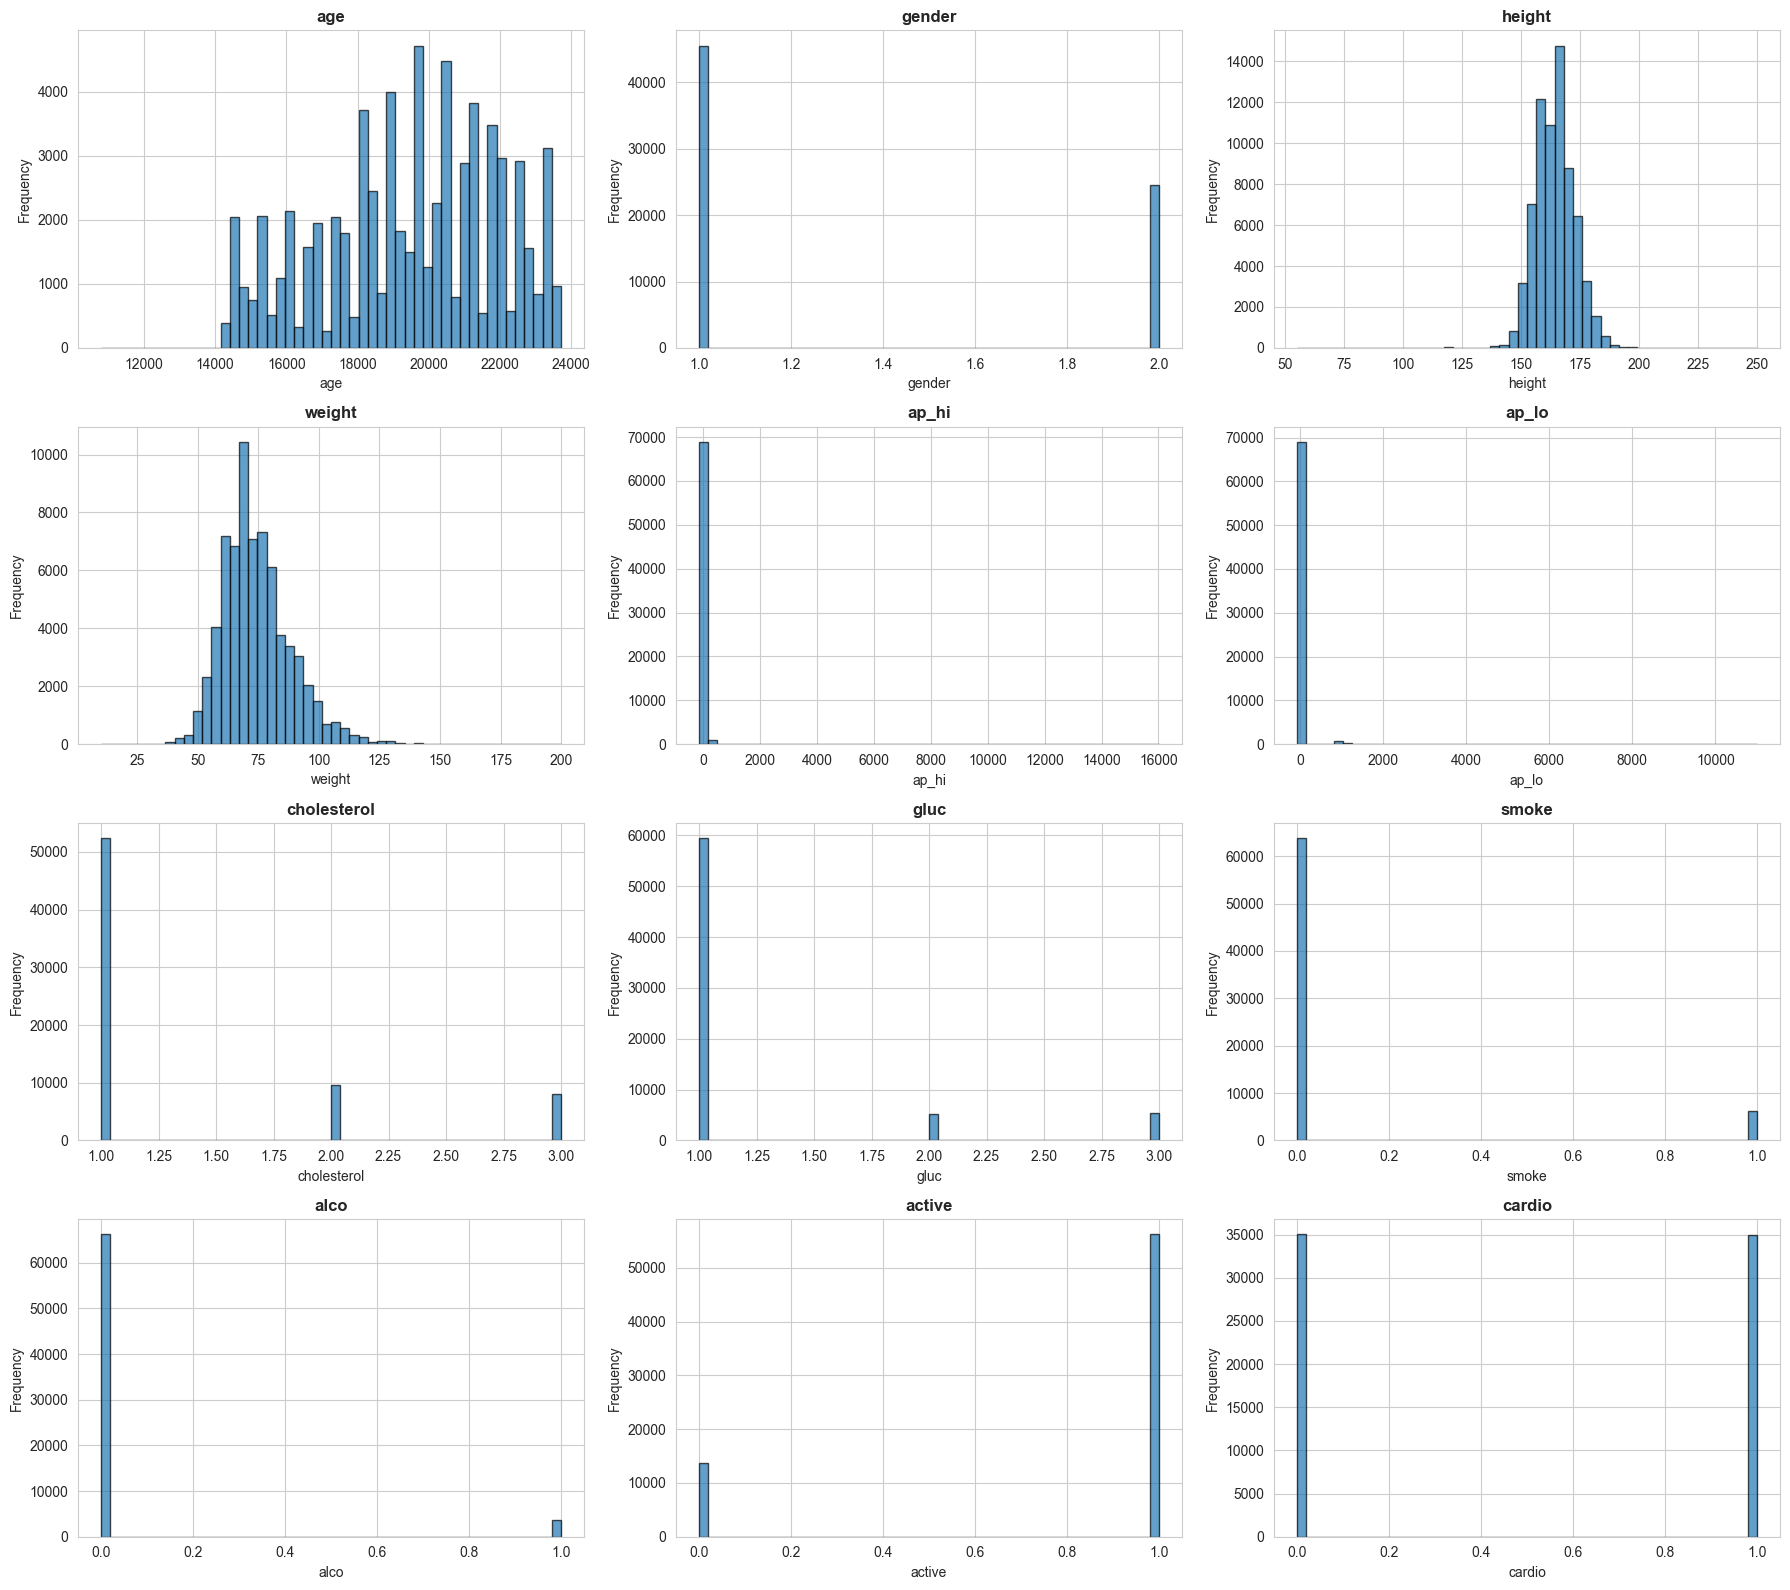

In [14]:
# Plot distributions
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Categorical Features

In [15]:
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

print("=" * 50)
print("CATEGORICAL FEATURES")
print("=" * 50)

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

CATEGORICAL FEATURES

GENDER:
gender
1    45530
2    24470
Name: count, dtype: int64
Unique values: 2

CHOLESTEROL:
cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64
Unique values: 3

GLUC:
gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64
Unique values: 3

SMOKE:
smoke
0    63831
1     6169
Name: count, dtype: int64
Unique values: 2

ALCO:
alco
0    66236
1     3764
Name: count, dtype: int64
Unique values: 2

ACTIVE:
active
1    56261
0    13739
Name: count, dtype: int64
Unique values: 2


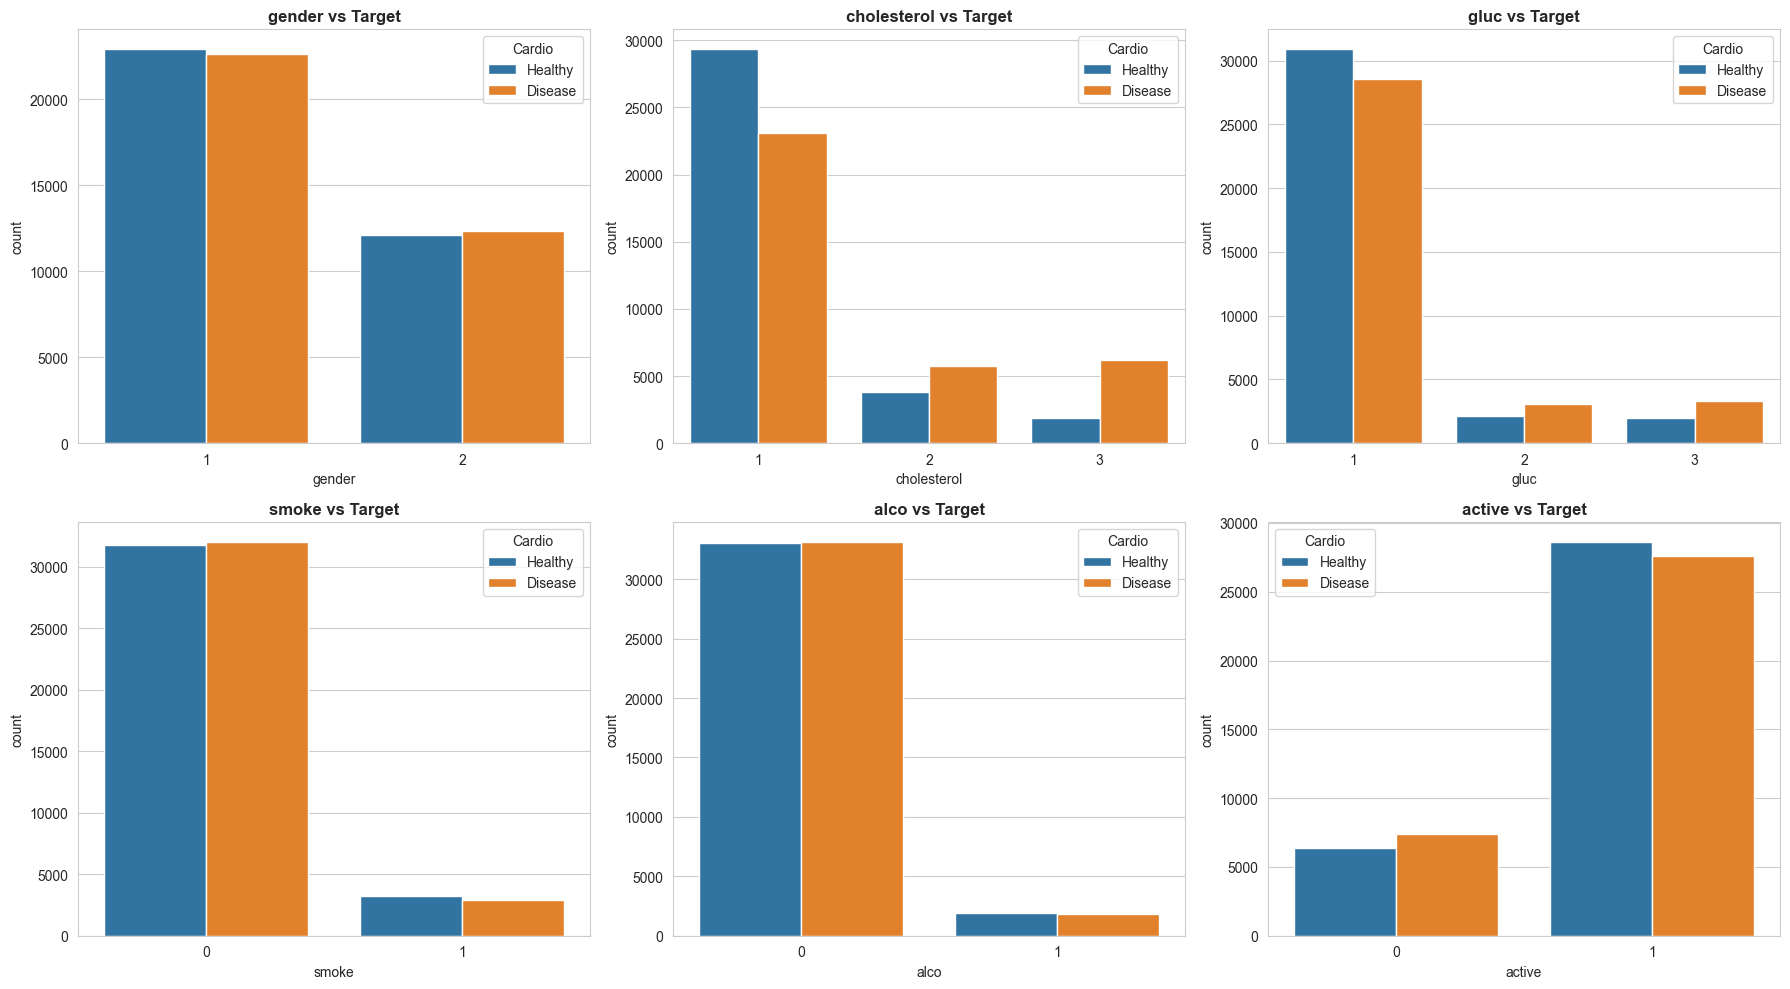

In [16]:
# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='cardio', ax=axes[idx])
    axes[idx].set_title(f'{col} vs Target', fontsize=12, fontweight='bold')
    axes[idx].legend(title='Cardio', labels=['Healthy', 'Disease'])

plt.tight_layout()
plt.show()

##### Correlation Matrix

CORRELATION ANALYSIS


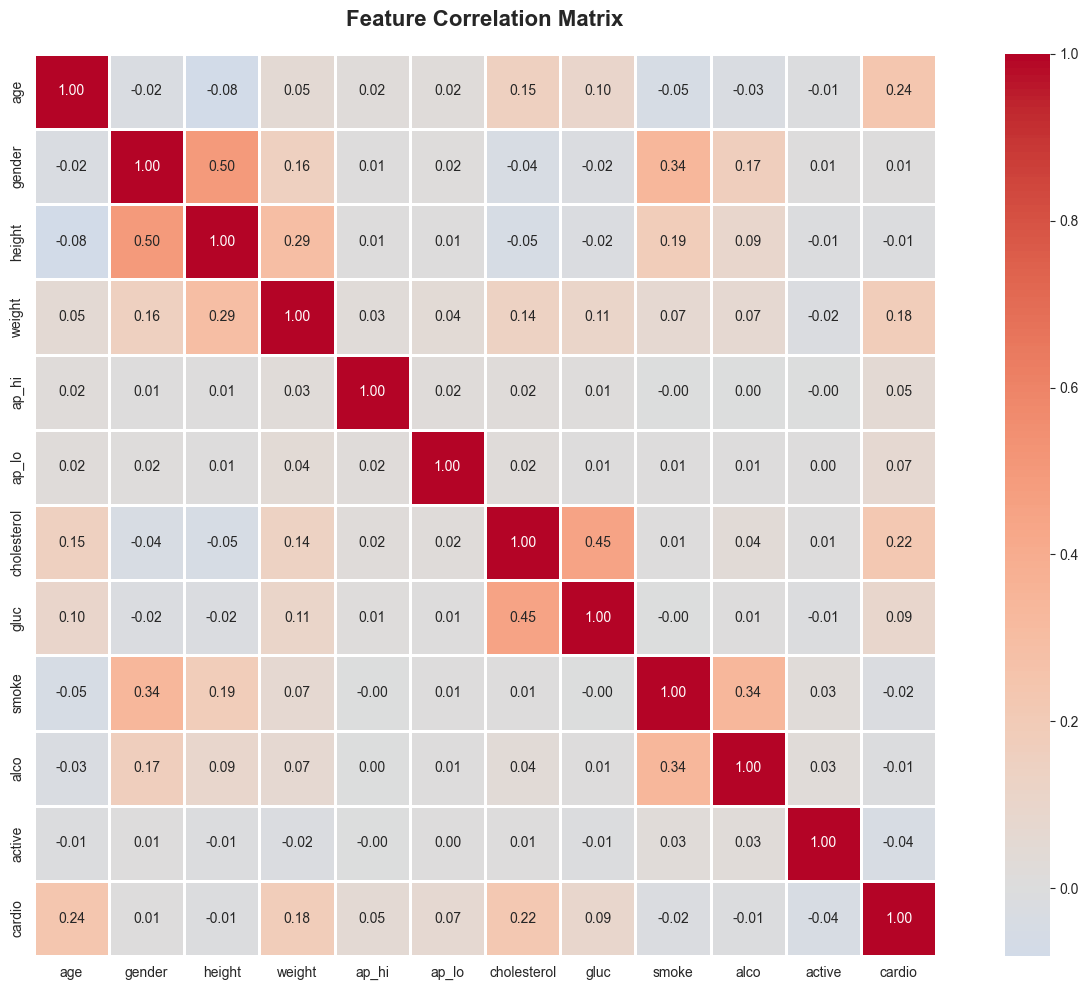


Top correlations with target (cardio):
cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64


In [17]:
print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)

corr_matrix = df.drop('id', axis=1).corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Top correlations with target
print("\nTop correlations with target (cardio):")
target_corr = corr_matrix['cardio'].sort_values(ascending=False)
print(target_corr)

##### Outlier Detection

OUTLIER ANALYSIS


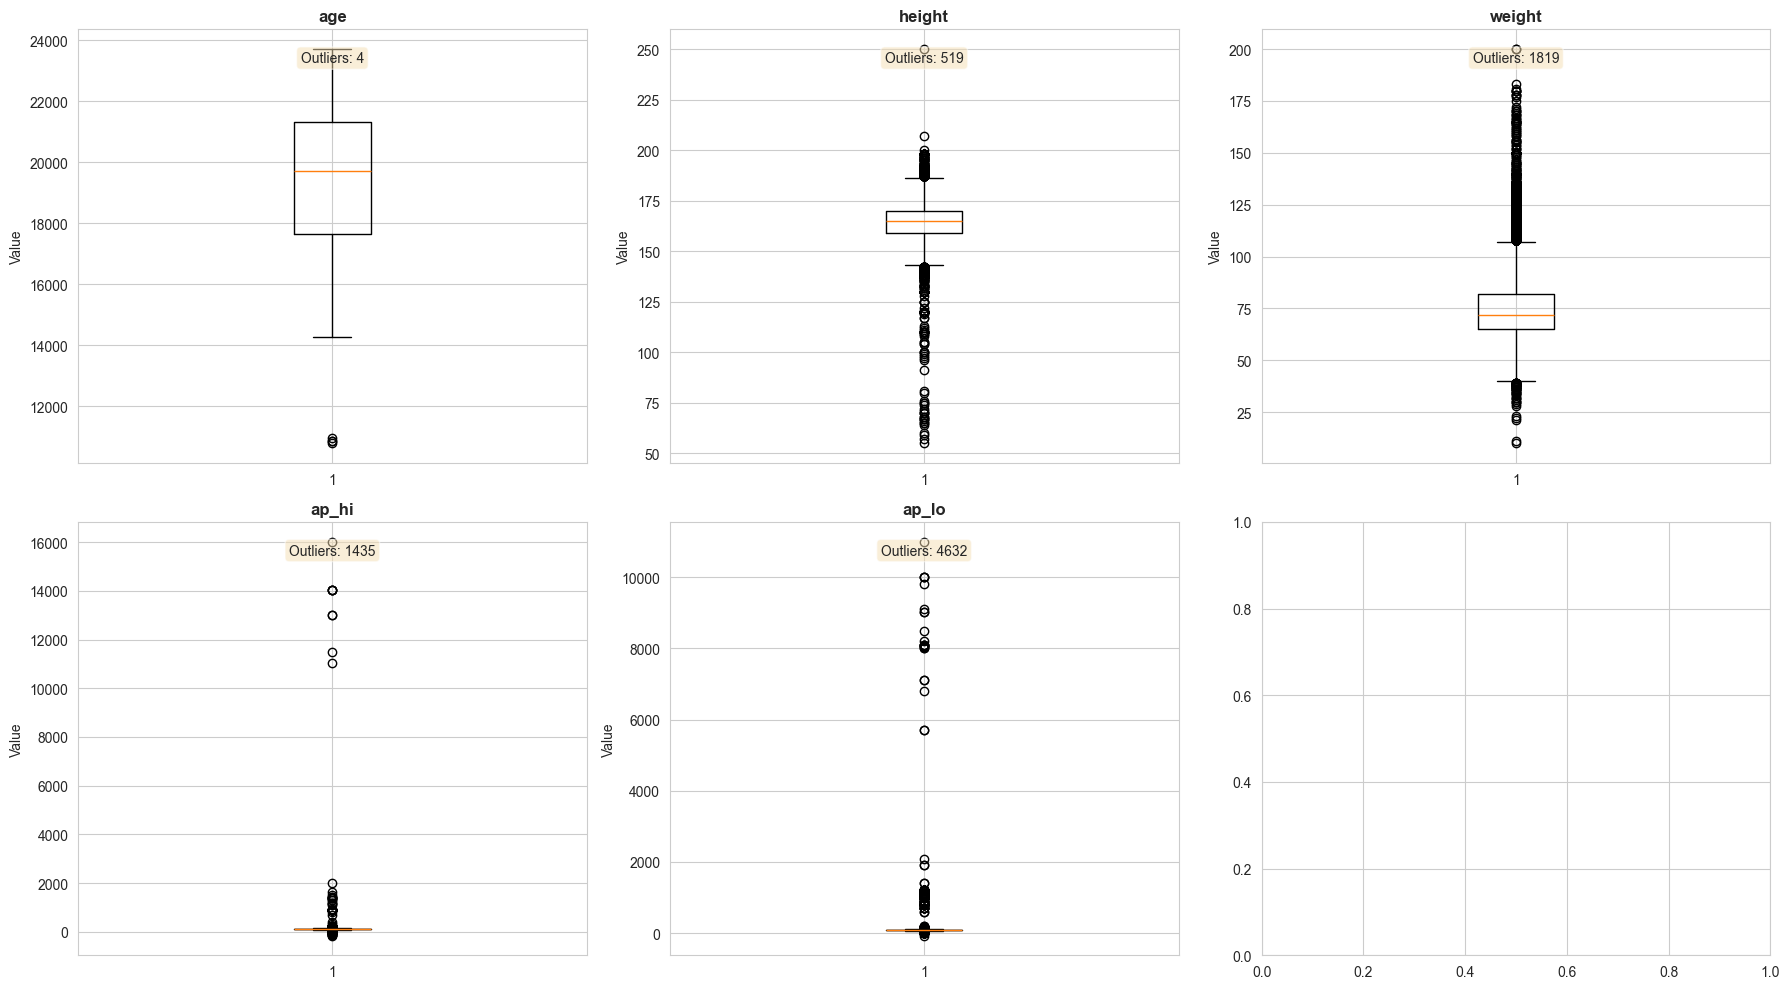

In [18]:
key_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

print("=" * 50)
print("OUTLIER ANALYSIS")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    if idx < len(axes):
        axes[idx].boxplot(df[col])
        axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Value')
        
        # Calculate outlier statistics
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        axes[idx].text(0.5, 0.95, f'Outliers: {outliers}', 
                      transform=axes[idx].transAxes, ha='center', va='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


# 📊 EDA Findings & Key Insights

## Dataset General Information
- **Total Records:** 70,000 rows
- **Feature Count:** 11 features + 1 target
- **Missing Data:** None (0 null values)
- **Target Distribution:** Balanced (~50%-50%)

## Variable Descriptions

### Demographic Features
- **age:** Age (in days) - needs to be converted to years
- **gender:** Gender (1: female, 2: male)
- **height:** Height (cm)
- **weight:** Weight (kg)

### Clinical Measurements
- **ap_hi:** Systolic blood pressure
- **ap_lo:** Diastolic blood pressure
- **cholesterol:** Cholesterol (1: normal, 2: above normal, 3: well above normal)
- **gluc:** Glucose (1: normal, 2: above normal, 3: well above normal)

### Lifestyle
- **smoke:** Smoking (0: no, 1: yes)
- **alco:** Alcohol intake (0: no, 1: yes)
- **active:** Physical activity (0: no, 1: yes)

## Key Findings

### 1. Target Variable
- ✅ **Class Balance:** Perfect balance (~50% diseased, ~50% healthy).
- No imbalanced learning techniques (like SMOTE) will be required.

### 2. Outliers & Anomalies
- **Blood Pressure:** Contains negative values and extremely high values (needs cleaning).
- **Height/Weight:** Contains unrealistic values (e.g., extremely low/high weights) that require filtering.
- **Age:** Currently in days, conversion to years is necessary for interpretability.

### 3. Correlations
- **High Correlation:** age, weight, ap_hi, ap_lo, cholesterol show the strongest correlation with the target.
- **Low Correlation:** Gender shows weak correlation.
- **Very Low Correlation:** Smoke and Alcohol intake show surprisingly low correlation with the target in this specific dataset.

### 4. Feature Engineering Opportunities
- **BMI:** Body Mass Index can be calculated from height and weight.
- **Pulse Pressure:** Can be derived (ap_hi - ap_lo).
- **Age Grouping:** Age can be binned into categories.
- **BP Categories:** Blood pressure levels can be categorized (Normal, Elevated, High, etc.).

## Data Quality Issues Identified
1. Negative blood pressure values.
2. Extremely high/low height and weight values.
3. Logical errors where `ap_hi < ap_lo` (Systolic < Diastolic).

## Next Steps
1. Data cleaning and filtering (handling outliers).
2. Feature engineering (creating BMI, BP categories).
3. Establishing a baseline model.